In [164]:
import requests
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Reading and Augumenting

In [163]:
df = pd.read_csv('ballon-dor.csv')
df.head()

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90
1,1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48
2,2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61
3,3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45


#### While doing player analysis, it was found that there are some unnecessary spaces after the players' name. This was not giving us the desired output while comparing the players name. Hence let's clean them.

In [165]:
df['Player']= df['Player'].apply(lambda x: x.strip())

#### We can see in the dataframe above that there exsts no information regarding the nationality of a player. So we are going to scrape it from a website and create a new column named 'Country'. However, we only need the nationality of winners so we are going to scrape only the winners nationalities.

In [166]:
URL = 'https://www.topendsports.com/sport/soccer/list-player-of-the-year-ballondor.htm'
def scraper():
    data = requests.get(URL)
    df_list = pd.read_html(data.text) # this parses all the tables in webpages to a list
    return df_list[0]

In [167]:
df2 = scraper()
df2.to_csv('nationality.csv')
print(df2.head())

   year           player  Nationality                      club
0  2022  Karim Benzemais       France               Real Madrid
1  2021     Lionel Messi    Argentina  Paris Saint-Germain F.C.
2  2020      not awarded  not awarded               not awarded
3  2019     Lionel Messi    Argentina                 Barcelona
4  2018      Luka Modric      Croatia               Real Madrid


In [168]:
# Since we only need the countries
countries = list(df2['Nationality'])
countries.remove('not awarded')

#### In 2020, Ballon D'or wasn't awarded due to covid-19. Hence there existed 'not awarded' in the countries list which was removed. Now let us create a new Column named 'Country' in the original df dataframe.

In [169]:
# reversing the countries because our dataset contains data from 1956-2022 in ascending whereas the scraped data is in descending order.
df.loc[df['Rank']=='1st','Country'] = countries[::-1]
df.head()

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90,England
1,1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48,NaN
2,2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61,NaN
3,3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54,Spain
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45,NaN


#### In 1989 the Berlin Wall fell and West Germany and East Germany were united to form a single country named Germany. Since we have players from West Germany who won the award before the fall of the Berlin Wall, and the unified German players who won it after the fall of the Wall. Hence, we are going to change West Germany to Germany. However, we aren't going to touch the Soviet Union here, because the USSR was later collapsed and was divided into different countries. Hence adding a player, suppose Andy Shevchenko from Ukraine into Soviet Union could be controversial. 

In [170]:
df.loc[df['Country']== 'West Germany','Country'] = 'Germany'
df.loc[df['Country']== 'Germany']

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country
43,43,1970,1st,Gerd Müller,Bayern Munich,77.0,36.32,Germany
49,49,1972,1st,Franz Beckenbauer,Bayern Munich,81.0,33.89,Germany
61,61,1976,1st,Franz Beckenbauer,Bayern Munich,91.0,41.74,Germany
73,73,1980,1st,Karl-Heinz Rummenigge,Bayern Munich,122.0,64.55,Germany
76,76,1981,1st,Karl-Heinz Rummenigge,Bayern Munich,106.0,50.72,Germany
103,103,1990,1st,Lothar Matthäus,Internazionale,137.0,47.40,Germany
122,122,1996,1st,Matthias Sammer,Borussia Dortmund,144.0,36.55,Germany


# 2. Analysis

## A. Most Wins by Club and Top 3 Representation

In [171]:
wins = df[df['Rank'] == '1st'].groupby('Club')
wins = wins.count()['Player'].sort_values(ascending=False) [:7]  # we are only going to plot top 7
wins

Club
Real Madrid          12
Barcelona            12
Milan                 8
Juventus              8
Bayern Munich         5
Manchester United     4
Internazionale        2
Name: Player, dtype: int64

In [172]:
top3_rep = df.groupby('Club')
top3_rep = top3_rep.count()['Player'].sort_values(ascending=False) [:7] 
top3_rep = top3_rep.reindex(wins.index) # fortunaely in our case 1st 7 teams of result 1 and result 2 are same, so just maintain them in the same order using reindex
top3_rep

Club
Real Madrid          27
Barcelona            34
Milan                17
Juventus             18
Bayern Munich        19
Manchester United    11
Internazionale       11
Name: Player, dtype: int64

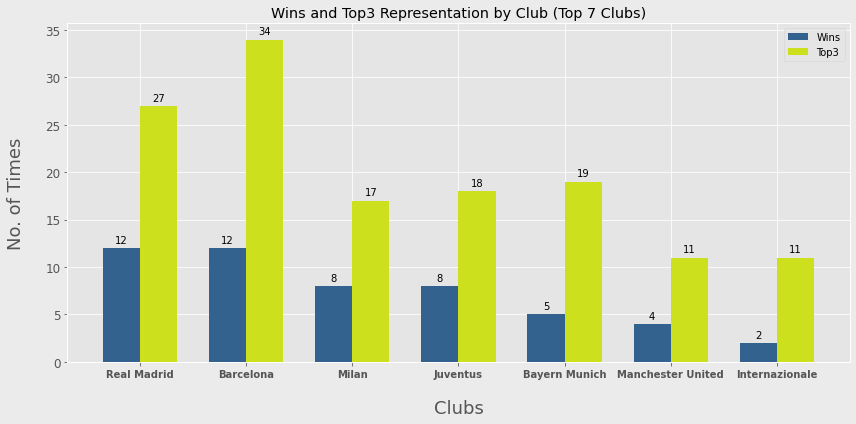

In [173]:
labels = wins.index
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12,6),facecolor=(.92, .92, .92))
rects1 = ax.bar(x - width/2, wins, width, label='Wins',color = "#32628d")
rects2 = ax.bar(x + width/2, top3_rep, width, label='Top3', color = "#cde01d")

# Add some text for labels, title and custom x-axis tick labels, etc.
fontdict = {'fontsize':18,}
ax.set_xlabel('Clubs',labelpad=20, fontdict=fontdict )
ax.set_ylabel('No. of Times',labelpad=20, fontdict=fontdict)
ax.set_title('Wins and Top3 Representation by Club (Top 7 Clubs)')
ax.set_xticks(x, labels,weight = 'bold')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.legend(loc='upper right')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## B. Most Number of Winners by Club

In [174]:
winners = df[df['Rank'] == '1st'].groupby('Club').nunique()
winners = winners['Player'].sort_values(ascending=False) [:7]
winners

Club
Real Madrid          8
Milan                6
Juventus             6
Barcelona            6
Manchester United    4
Bayern Munich        3
Internazionale       2
Name: Player, dtype: int64

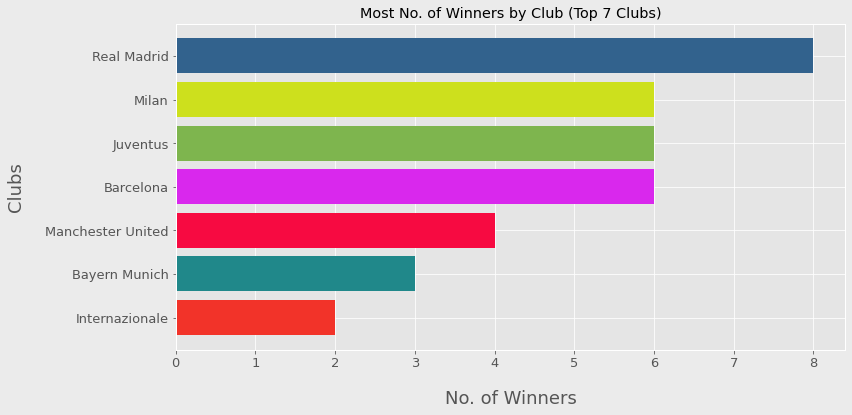

In [175]:

fig, ax = plt.subplots(figsize=(12,6),facecolor=(.92, .92, .92))

color = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41','#20888a','#f23329']
ax.barh(winners.index, winners, color = color)

ax.set_ylabel("Clubs",fontsize = 18, labelpad=20)
ax.set_xlabel("No. of Winners",fontsize = 18, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=13)


ax.set_title("Most No. of Winners by Club (Top 7 Clubs)")
ax.invert_yaxis()  # this makes sure Real Madrid comes at the top and Inter at the bottom
plt.show()

## C. Most Number of Winners by Country

In [196]:
winners_country = df[df['Rank'] == '1st'].groupby('Country').nunique()
winners_country = winners_country['Player'].sort_values(ascending=False) [:7]
winners_country

Country
France          5
Germany         5
Italy           5
England         4
Brazil          4
Netherlands     3
Soviet Union    3
Name: Player, dtype: int64

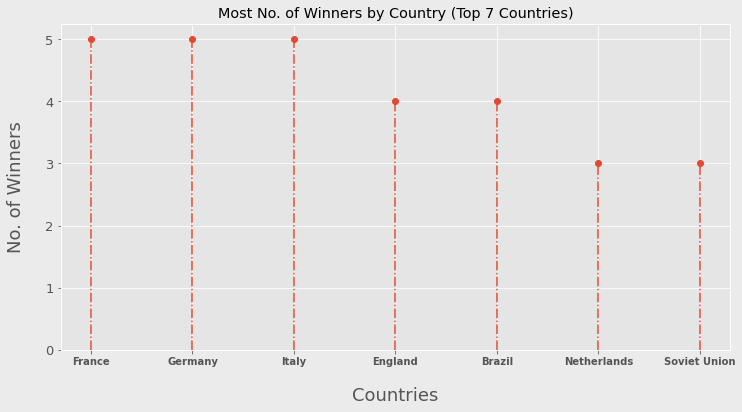

In [197]:
fig, ax = plt.subplots(figsize=(12,6),facecolor=(.92, .92, .92))
  
# plotting using plt.stem
ax.stem(winners_country.index, winners_country, linefmt='-.',
          use_line_collection=True, basefmt=' ')
  
# starting value of y-axis
ax.set_ylim(0)
  
# details and formatting of chart
ax.set_title('Most No. of Winners by Country (Top 7 Countries)')
ax.set_xlabel('Countries', fontsize = 18, labelpad=20)
ax.set_ylabel('No. of Winners', fontsize = 18, labelpad=20)

ax.tick_params(axis='y', which='major', labelsize=13)

labels = ax.get_xticklabels()
for label in labels:
    label.set_fontweight('bold')

ax.set_xticks(winners_country.index,weight="bold")

plt.show()

## D. Players With Most No of Wins

In [198]:
player = df[df['Rank'] == '1st'].groupby('Player').count()
player = player['Year'].sort_values(ascending=False) [:10]
player


Player
Lionel Messi             7
Cristiano Ronaldo        5
Michel Platini           3
Marco van Basten         3
Johan Cruyff             3
Alfredo Di Stéfano       2
Franz Beckenbauer        2
Ronaldo                  2
Karl-Heinz Rummenigge    2
Kevin Keegan             2
Name: Year, dtype: int64

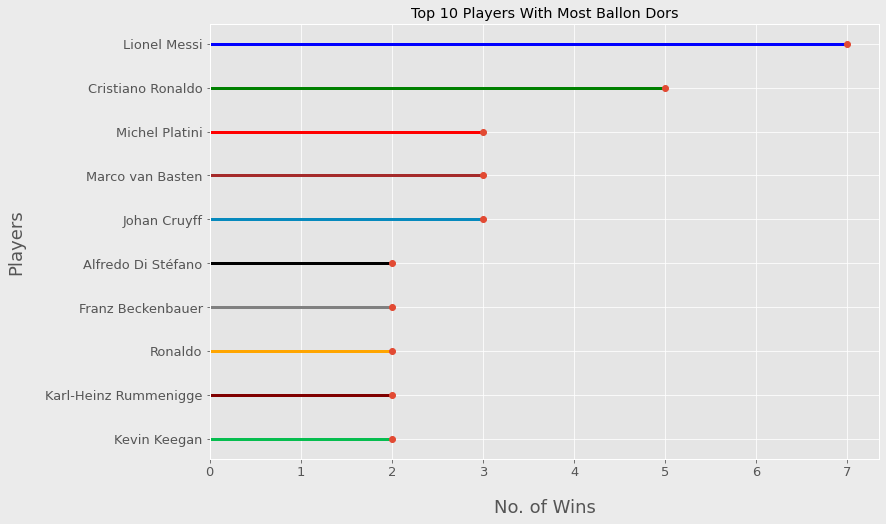

In [199]:
fig, ax = plt.subplots(figsize=(12,8),facecolor=(.92, .92, .92))
  
line_colors = ['blue','green', 'red',
                'brown', '#0689bd',
               'black', 'grey', 'orange', 'maroon',
               '#06bd4f']
  
ax.hlines(player.index, xmin=0,
            xmax=player, colors=line_colors, linewidth=3)
  
ax.plot(player, player.index, "o")
ax.set_xlim(0)
ax.invert_yaxis()
  
ax.set_xlabel('No. of Wins',fontsize = 18, labelpad=20)
ax.set_ylabel('Players',fontsize = 18, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_title('Top 10 Players With Most Ballon Dors')
ax.set_yticks(player.index)
plt.show()

## E. Players with most top 3 finishes

In [194]:
top3 = df.groupby('Player').count()
top3 = top3['Year'].sort_values(ascending=False)[:19]
top3

Player
Lionel Messi             13
Cristiano Ronaldo        12
Michel Platini            5
Franz Beckenbauer         5
Raymond Kopa              4
Luis Suárez               4
Johan Cruyff              4
Gerd Müller               4
Ronaldo                   4
Karl-Heinz Rummenigge     3
Marco van Basten          3
Eusébio                   3
Zinedine Zidane           3
Kevin Keegan              3
Xavi                      3
Bobby Charlton            3
Andriy Shevchenko         3
Bernd Schuster            3
Alfredo Di Stéfano        3
Name: Year, dtype: int64

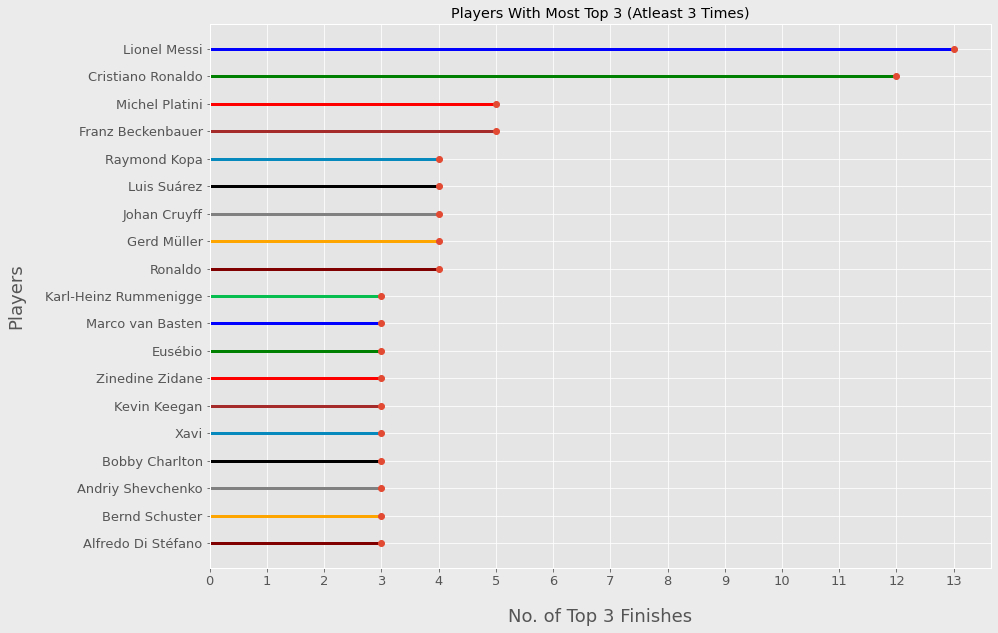

In [195]:
fig, ax = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))
  
line_colors = ['blue','green', 'red',
                'brown', '#0689bd',
               'black', 'grey', 'orange', 'maroon',
               '#06bd4f']
xticks = [i for i in range (max(top3) + 1)]
  
ax.hlines(top3.index, xmin=0,
            xmax=top3, colors=line_colors,linewidth=3)  
ax.plot(top3, top3.index, "o")
ax.set_xlim(0)
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=13)

  
ax.set_xlabel('No. of Top 3 Finishes',fontsize = 18, labelpad=20)
ax.set_ylabel('Players',fontsize = 18, labelpad=20)
ax.set_title('Players With Most Top 3 (Atleast 3 Times)')
ax.set_yticks(top3.index)
ax.set_xticks(xticks)
plt.show()


## F. Players with most top3 finishes but zero wins.

In [217]:
winners = df[df['Rank']== '1st'].groupby('Player').nunique()  # all the winners
runner_ups = df[~df['Player'].isin(winners.index)]  # those players who finished top 3 but never won
runner_ups

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country,Percentage_Diff
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45,NaN,NaN
5,5,1957,3rd,Duncan Edwards,Manchester United,16.0,13.01,NaN,NaN
8,8,1958,2nd,Helmut Rahn,Rot-Weiss Essen,40.0,29.85,NaN,NaN
9,9,1958,3rd,Just Fontaine,Stade de Reims,23.0,17.16,NaN,NaN
12,12,1959,3rd,John Charles,Juventus,24.0,16.44,NaN,NaN
...,...,...,...,...,...,...,...,...,...
192,192,2019,2nd,Virgil van Dijk,Liverpool,679.0,36.88,NaN,NaN
195,195,2021,2nd,Robert Lewandowski,Bayern Munich,580.0,35.08,NaN,NaN
196,196,2021,3rd,Jorginho,Chelsea,460.0,27.82,NaN,NaN
198,198,2022,2nd,Sadio Mané,Liverpool,NaN,NaN,NaN,NaN


In [218]:
runner_ups = runner_ups.groupby('Player').count()
runner_ups = runner_ups['Year'].sort_values(ascending=False) [:14]
runner_ups

Player
Xavi                 3
Bernd Schuster       3
Emilio Butragueño    2
Luigi Riva           2
Paolo Maldini        2
Frank Rijkaard       2
Oliver Kahn          2
Rob Rensenbrink      2
Neymar               2
Dennis Bergkamp      2
Preben Elkjær        2
Thierry Henry        2
Antoine Griezmann    2
Andrés Iniesta       2
Name: Year, dtype: int64

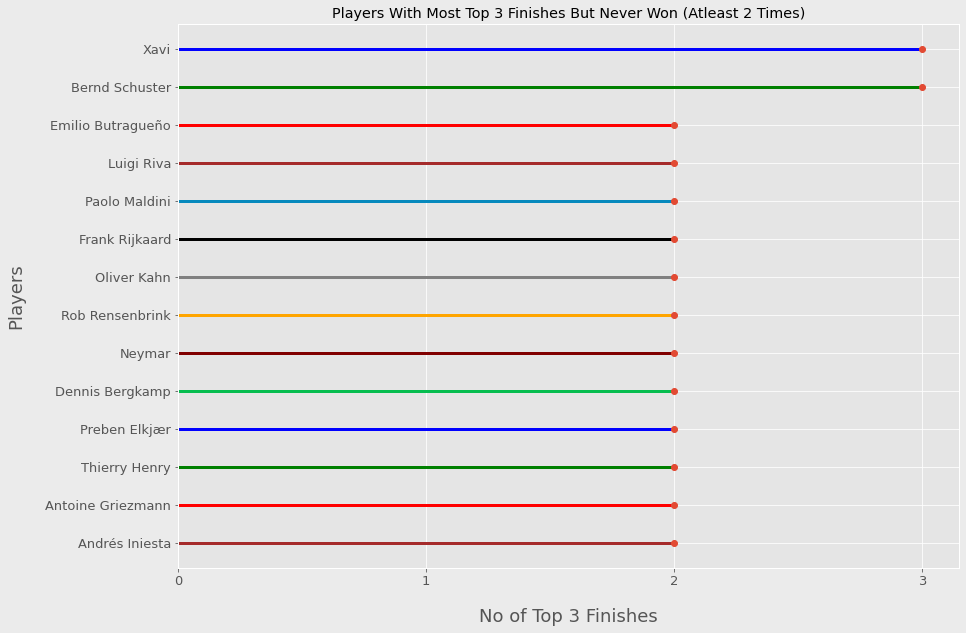

In [219]:
fig, ax = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))
  
line_colors = ['blue','green', 'red',
                'brown', '#0689bd',
               'black', 'grey', 'orange', 'maroon',
               '#06bd4f']
xticks = [i for i in range (max(runner_ups) + 1)]
  
ax.hlines(runner_ups.index, xmin=0,
            xmax=runner_ups, colors=line_colors,linewidth=3)  
ax.plot(runner_ups, runner_ups.index, "o")
ax.set_xlim(0)
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_xlabel('No of Top 3 Finishes',fontsize = 18, labelpad=20)
ax.set_ylabel('Players',fontsize = 18, labelpad=20)
ax.set_title('Players With Most Top 3 Finishes But Never Won (Atleast 2 Times)')
ax.set_yticks(runner_ups.index)
ax.set_xticks(xticks)
plt.show()

## G. Winners With Highest Vote Percentage

In [204]:
winners = df[df['Rank']== '1st']
winners = winners.sort_values(by=['Percentages'],ascending= False) [:5]
winners

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country
82,82,1983,1st,Michel Platini,Juventus,110.0,68.32,France
128,128,1998,1st,Zinedine Zidane,Juventus,244.0,64.55,France
73,73,1980,1st,Karl-Heinz Rummenigge,Bayern Munich,122.0,64.55,Germany
58,58,1975,1st,Oleg Blokhin,Dynamo Kyiv,122.0,63.87,Soviet Union
125,125,1997,1st,Ronaldo,Internazionale,222.0,62.89,Brazil


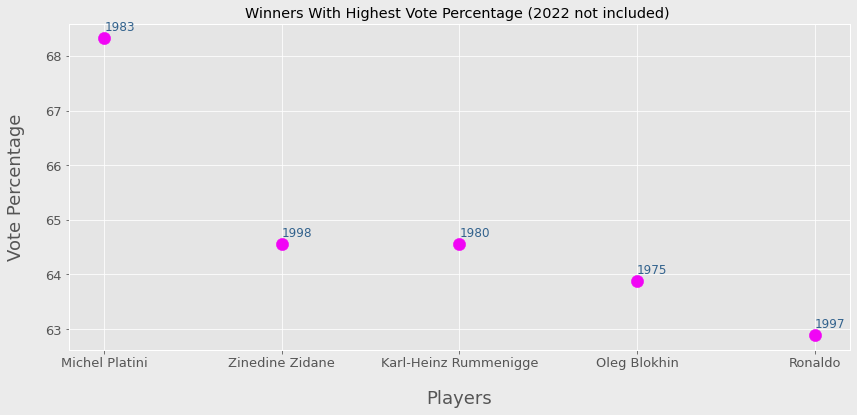

In [205]:

fig, ax = plt.subplots(figsize=(14,6),facecolor=(.92, .92, .92))

ax.scatter(winners['Player'], winners['Percentages'], marker='o', color='#f105f5', label="Winner", s = 150)

ax.set_ylabel("Vote Percentage",fontsize = 18,labelpad=20)
ax.set_xlabel("Players",fontsize = 18,labelpad=20)
ax.set_xticks(winners['Player'])
ax.tick_params(axis='both', which='major', labelsize=13)

for idx, row in winners.iterrows():
    ax.annotate(row['Year'], (row['Player'], row['Percentages']+.14), fontsize=12,color="#32628d")
# ax.legend()
ax.set_title("Winners With Highest Vote Percentage (2022 not included) ")
plt.show()

## H. Most Competitive Years

In [206]:
percentage_diff = []
for i in df.index:
    if df['Rank'][i] == "1st":
        diff = df['Percentages'][i]-df['Percentages'][i+1]
        percentage_diff.append(diff)

len(percentage_diff)

66

### Adding a new column that specifies the vote percentage difference between the winner and the first runner up of each year.

In [207]:
df.loc[df['Rank']=='1st','Percentage_Diff'] = percentage_diff
df

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country,Percentage_Diff
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90,England,2.42
1,1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48,NaN,NaN
2,2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61,NaN,NaN
3,3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54,Spain,43.09
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,195,2021,2nd,Robert Lewandowski,Bayern Munich,580.0,35.08,NaN,NaN
196,196,2021,3rd,Jorginho,Chelsea,460.0,27.82,NaN,NaN
197,197,2022,1st,Karim Benzema,Real Madrid,NaN,NaN,France,NaN
198,198,2022,2nd,Sadio Mané,Liverpool,NaN,NaN,NaN,NaN


In [208]:
close_winners = df.sort_values(by=['Percentage_Diff'],ascending= True) [:10]
close_winners

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country,Percentage_Diff
122,122,1996,1st,Matthias Sammer,Borussia Dortmund,144.0,36.55,Germany,0.26
191,191,2019,1st,Lionel Messi,Barcelona,686.0,37.26,Argentina,0.38
31,31,1966,1st,Bobby Charlton,Manchester United,81.0,36.82,England,0.46
49,49,1972,1st,Franz Beckenbauer,Bayern Munich,81.0,33.89,Germany,0.84
64,64,1977,1st,Allan Simonsen,Borussia Mönchengladbach,74.0,34.42,Denmark,1.40
194,194,2021,1st,Lionel Messi,Paris Saint-Germain,613.0,37.08,Argentina,2.00
40,40,1969,1st,Gianni Rivera,Milan,83.0,41.50,Italy,2.00
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90,England,2.42
67,67,1978,1st,Kevin Keegan,Hamburg,87.0,39.91,England,2.75
173,173,2013,1st,Cristiano Ronaldo,Real Madrid,NaN,27.99,Portugal,3.27


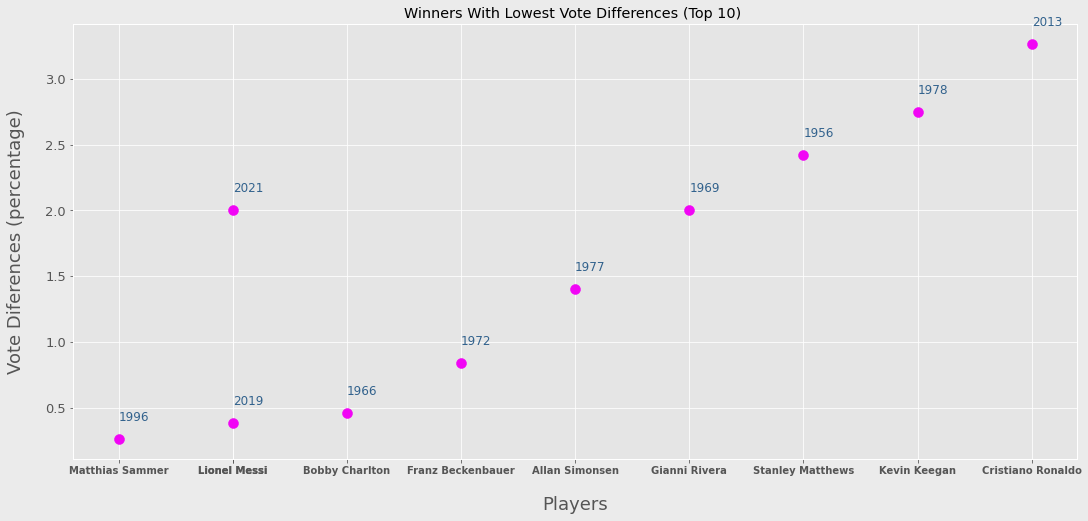

In [209]:

fig, ax = plt.subplots(figsize=(18,8),facecolor=(.92, .92, .92))

ax.scatter(close_winners['Player'], close_winners['Percentage_Diff'], marker='o', color='#f105f5', label="Winner", s = 100)

ax.set_ylabel("Vote Diferences (percentage)",fontsize = 18,labelpad=20)
ax.set_xlabel("Players",fontsize = 18,labelpad=20)
ax.set_xticks(close_winners['Player'])
ax.tick_params(axis='y', which='major', labelsize=13)

labels = ax.get_xticklabels()
for label in labels:
    label.set_fontweight('bold') 

for idx, row in close_winners.iterrows():
    ax.annotate(row['Year'], (row['Player'], row['Percentage_Diff']+.14), fontsize=12,color="#32628d")

ax.set_title("Winners With Lowest Vote Differences (Top 10) ")

plt.show()

## I.Votes over the years

In [210]:
first = df[df['Rank']== "1st"]
second = df[df['Rank']== "2nd"]
third = df[df['Rank']== "3rd"]


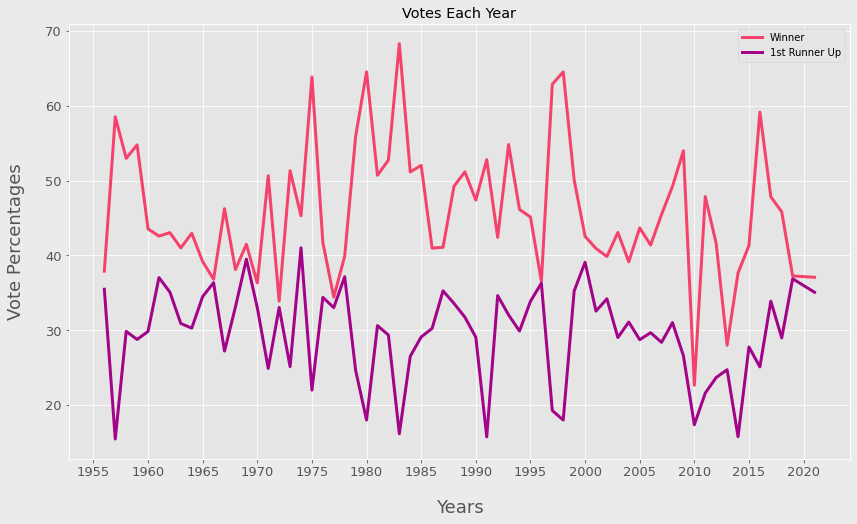

In [213]:
fig, ax = plt.subplots(figsize=(14,8),facecolor=(.92, .92, .92))

ax.plot(first['Year'], first['Percentages'],color='#f5426c',linewidth=3,linestyle='-', label="Winner")
ax.plot(second['Year'], second['Percentages'],color='#a30389',linewidth=3,linestyle='-',label="1st Runner Up")
# ax.plot(third['Year'], third['Percentages'],color='blue',linewidth=3,linestyle='-')

xticks = [i for i in range(1955,2025,5)]

ax.set_ylabel("Vote Percentages",fontsize = 18,labelpad=20)
ax.set_xlabel("Years",fontsize = 18,labelpad=20)
ax.set_xticks(xticks)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.legend()
ax.set_title("Votes Each Year")
plt.show()


## J. Messi

In [214]:
messi = df.loc[df['Player']== "Lionel Messi"]
messi_1st = messi.loc[messi['Rank']== "1st"]
messi_2nd = messi.loc[messi['Rank']== "2nd"]
messi_3rd = messi.loc[messi['Rank']== "3rd"]
messi

,Unnamed: 0,Year,Rank,Player,Club,Points,Percentages,Country,Percentage_Diff
157,157,2007,3rd,Lionel Messi,Barcelona,255.0,26.13,NaN,NaN
159,159,2008,2nd,Lionel Messi,Barcelona,281.0,31.02,NaN,NaN
161,161,2009,1st,Lionel Messi,Barcelona,473.0,54.00,Argentina,27.40
164,164,2010,1st,Lionel Messi,Barcelona,NaN,22.65,Argentina,5.29
167,167,2011,1st,Lionel Messi,Barcelona,NaN,47.88,Argentina,26.28
170,170,2012,1st,Lionel Messi,Barcelona,NaN,41.60,Argentina,17.92
174,174,2013,2nd,Lionel Messi,Barcelona,NaN,24.72,NaN,NaN
177,177,2014,2nd,Lionel Messi,Barcelona,NaN,15.76,NaN,NaN
179,179,2015,1st,Lionel Messi,Barcelona,NaN,41.33,Argentina,13.57
183,183,2016,2nd,Lionel Messi,Barcelona,316.0,25.10,NaN,NaN


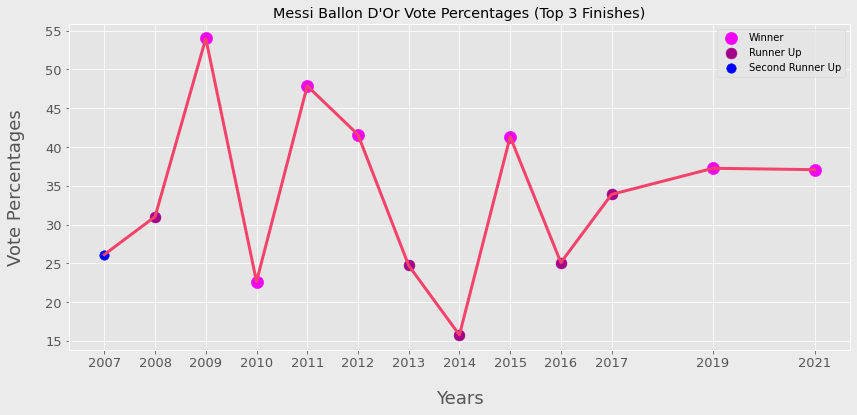

In [216]:
fig, ax = plt.subplots(figsize=(14,6),facecolor=(.92, .92, .92))

ax.plot(messi['Year'], messi['Percentages'],color='#f5426c',linewidth=3,linestyle='-')
ax.scatter(messi_1st['Year'], messi_1st['Percentages'], marker='o', color='#f105f5', label="Winner", s = 150)
ax.scatter(messi_2nd['Year'], messi_2nd['Percentages'], marker='o', color='#a30389',label="Runner Up", s= 120)
ax.scatter(messi_3rd['Year'], messi_3rd['Percentages'], marker='o', color='b',label="Second Runner Up", s= 90)

ax.set_ylabel("Vote Percentages",fontsize = 18,labelpad=20)
ax.set_xlabel("Years",fontsize = 18,labelpad=20)
ax.set_xticks(messi['Year'])
ax.tick_params(axis='both', which='major', labelsize=13)

ax.legend()
ax.set_title("Messi Ballon D'Or Vote Percentages (Top 3 Finishes)")
plt.show()

Thank You. Have a Great Day ❤️